In [58]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib
import os
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from IPython.display import Image
from keras import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense, Flatten, GlobalAveragePooling2D
import tf_keras

## Load Data

In [5]:
import zipfile
!unzip /content/CIFAKE.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/REAL/4500 (10).jpg  
  inflating: train/REAL/4500 (2).jpg  
  inflating: train/REAL/4500 (3).jpg  
  inflating: train/REAL/4500 (4).jpg  
  inflating: train/REAL/4500 (5).jpg  
  inflating: train/REAL/4500 (6).jpg  
  inflating: train/REAL/4500 (7).jpg  
  inflating: train/REAL/4500 (8).jpg  
  inflating: train/REAL/4500 (9).jpg  
  inflating: train/REAL/4500.jpg     
  inflating: train/REAL/4501 (10).jpg  
  inflating: train/REAL/4501 (2).jpg  
  inflating: train/REAL/4501 (3).jpg  
  inflating: train/REAL/4501 (4).jpg  
  inflating: train/REAL/4501 (5).jpg  
  inflating: train/REAL/4501 (6).jpg  
  inflating: train/REAL/4501 (7).jpg  
  inflating: train/REAL/4501 (8).jpg  
  inflating: train/REAL/4501 (9).jpg  
  inflating: train/REAL/4501.jpg     
  inflating: train/REAL/4502 (10).jpg  
  inflating: train/REAL/4502 (2).jpg  
  inflating: train/REAL/4502 (3).jpg  
  inflating: train/REAL/4502 (4).jpg  
  inflating:

In [6]:
dataset_dir = "train"
img_height = 32
img_width = 32
batch_size = 500

# Load training and validation data
train, val = keras.utils.image_dataset_from_directory(
  os.path.join(dataset_dir, ""),
  validation_split=0.2,
  subset="both",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 100000 files belonging to 2 classes.
Using 80000 files for training.
Using 20000 files for validation.


In [7]:
test = keras.utils.image_dataset_from_directory(
  os.path.join("test"),
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 20000 files belonging to 2 classes.


In [102]:
train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## CNN

In [8]:
keras.backend.clear_session()

cnn_model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),
    layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(units=512, activation="relu"),
    layers.Dense(units=1, activation="sigmoid")])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [73]:
es = EarlyStopping(monitor="val_accuracy",
                   patience=10,
                   restore_best_weights=True,
                   verbose=1)
cnn_model.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy", metrics.Precision(name="precision"), metrics.Recall(name="recall")])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                   

In [74]:
epochs = 80

history = cnn_model.fit(
  train,
  validation_data=val,
  epochs=epochs,
  verbose=3, callbacks=es)

history = pd.DataFrame(history.history)
pd.set_option("display.max_rows", 80)
display(history)

Epoch 1/80
Epoch 2/80
Epoch 3/80
Epoch 4/80
Epoch 5/80
Epoch 6/80
Epoch 7/80
Epoch 8/80
Epoch 9/80
Epoch 10/80
Epoch 11/80
Epoch 12/80
Epoch 13/80
Epoch 14/80
Epoch 15/80
Epoch 16/80
Epoch 17/80
Epoch 18/80
Epoch 19/80
Epoch 20/80
Epoch 21/80
Epoch 22/80
Epoch 23/80
Epoch 24/80
Epoch 25/80
Epoch 26/80
Epoch 27/80
Epoch 28/80
Epoch 29/80
Epoch 30/80
Epoch 31/80
Epoch 32/80
Epoch 33/80
Epoch 34/80
Epoch 35/80
Epoch 36/80
Epoch 37/80
Epoch 38/80
Epoch 39/80
Epoch 40/80
Epoch 41/80
Epoch 42/80
Epoch 43/80
Epoch 44/80
Epoch 45/80
Epoch 46/80
Epoch 47/80
Epoch 48/80
Epoch 49/80
Epoch 50/80
Restoring model weights from the end of the best epoch: 40.
Epoch 50: early stopping


,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
0,0.499745,0.743500,0.759956,0.711567,0.333840,0.86660,0.883175,0.845432
1,0.304660,0.870013,0.864863,0.876954,0.275563,0.89090,0.925660,0.850424
2,0.243777,0.900025,0.898652,0.901663,0.217255,0.91225,0.887357,0.944683
3,0.214221,0.913737,0.912416,0.915268,0.181003,0.93175,0.946152,0.915826
4,0.195076,0.922063,0.920928,0.923346,0.166433,0.93695,0.957462,0.914728
5,0.179983,0.927850,0.927481,0.928223,0.153654,0.94160,0.941511,0.941887
6,0.173631,0.930875,0.929089,0.932900,0.162100,0.93790,0.938256,0.937693
7,0.166692,0.935337,0.934563,0.936176,0.145423,0.94440,0.955210,0.932701
8,0.158030,0.937850,0.937608,0.938077,0.142639,0.94385,0.937168,0.951672
9,0.149768,0.941375,0.940560,0.942253,0.147797,0.94335,0.972045,0.913130


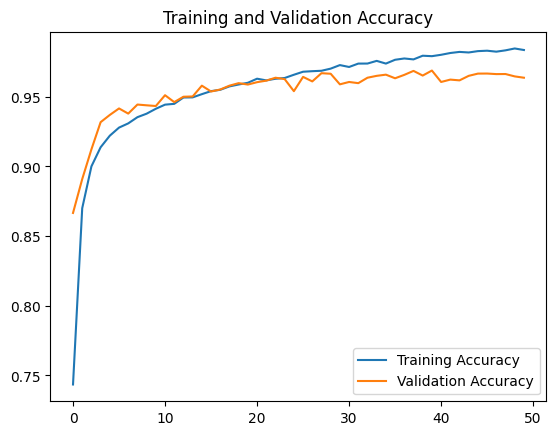

In [76]:
plt.plot(range(50), history["accuracy"], label="Training Accuracy")
plt.plot(range(50), history["val_accuracy"], label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
plt.show()

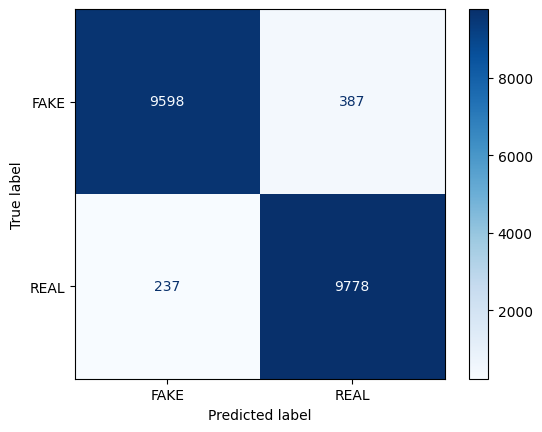

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay
classes = train.class_names
val_predictions = np.array([])
val_labels = np.array([])
for x, y in val:
    val_predictions = np.append(val_predictions, cnn_model(x) > 0.5)
    val_labels = np.append(val_labels, y)
ConfusionMatrixDisplay.from_predictions(val_labels, val_predictions, display_labels=classes, cmap="Blues");

## VGG

In [36]:
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input




def preprocess_vgg(x, y):
    return preprocess_input(x), y


class PreprocessVGGLayer(tf.keras.layers.Layer):
    def __init__(self, preprocess = preprocess_vgg):
        super(PreprocessVGGLayer, self).__init__()
        self.preprocess = preprocess_vgg

    def call(self, input):
        return self.preprocess(input)

    def get_config(self):
        config = super(PreprocessVGGLayer, self).get_config()
        return config
#trainvgg = train.map(preprocess)
#valvgg = val.map(preprocess)
#testvgg = test.map(preprocess)

In [22]:
vgg = VGG16(include_top=False, input_shape=(32, 32, 3))
vgg.trainable = False

In [50]:
vgg_model = Sequential([
    layers.Lambda(preprocess_vgg, output_shape=(32,32,3)),
    vgg,
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(units=1024, activation="relu"),
    layers.Dense(units=1, activation="sigmoid")])

In [15]:
vgg_model.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy", metrics.Precision(name="precision"), metrics.Recall(name="recall")])

In [16]:
vgg_model.summary(show_trainable=True)

Model: "sequential_1"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 vgg16 (Functional)          (None, 1, 1, 512)         1471468   N          
                                                       8                    
                                                                            
 flatten_1 (Flatten)         (None, 512)               0         Y          
                                                                            
 dropout_3 (Dropout)         (None, 512)               0         Y          
                                                                            
 dense_2 (Dense)             (None, 1024)              525312    Y          
                                                                            
 dense_3 (Dense)             (None, 1)                 1025      Y          
                                                      

In [17]:
epochs = 8

history = vgg_model.fit(
  trainvgg,
  validation_data=valvgg,
  epochs=epochs,
  verbose=3)

history = pd.DataFrame(history.history)
display(history)

Epoch 1/8
Epoch 2/8
Epoch 3/8
Epoch 4/8
Epoch 5/8
Epoch 6/8
Epoch 7/8
Epoch 8/8


,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
0,1.675997,0.740762,0.747086,0.727673,0.606507,0.81845,0.898204,0.718922
1,0.788655,0.779375,0.784399,0.770314,0.391496,0.84290,0.891981,0.780829
2,0.553609,0.801287,0.806089,0.793247,0.349182,0.85025,0.897599,0.791213
3,0.449315,0.814587,0.819805,0.806252,0.341502,0.85520,0.887703,0.813779
4,0.403049,0.824787,0.830063,0.816631,0.327275,0.86365,0.914562,0.802696
5,0.381996,0.832000,0.836584,0.825034,0.322029,0.87005,0.911086,0.820569
6,0.365694,0.838488,0.842652,0.832262,0.312970,0.87845,0.911101,0.839141
7,0.356165,0.844400,0.848526,0.838339,0.312815,0.88125,0.906989,0.850025


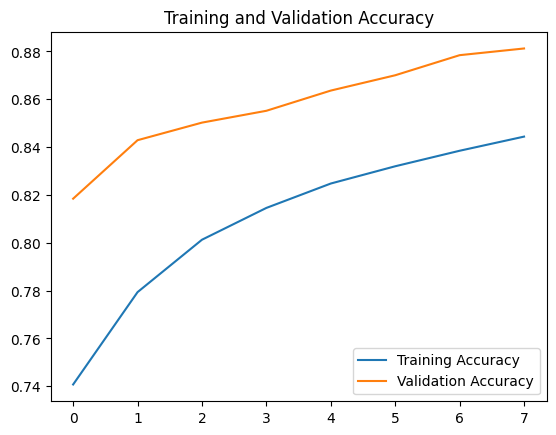

In [18]:
plt.plot(range(epochs), history["accuracy"], label="Training Accuracy")
plt.plot(range(epochs), history["val_accuracy"], label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
plt.show()

In [19]:
vgg.trainable = True

vgg_model.summary(show_trainable=True)

Model: "sequential_1"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 vgg16 (Functional)          (None, 1, 1, 512)         1471468   Y          
                                                       8                    
                                                                            
 flatten_1 (Flatten)         (None, 512)               0         Y          
                                                                            
 dropout_3 (Dropout)         (None, 512)               0         Y          
                                                                            
 dense_2 (Dense)             (None, 1024)              525312    Y          
                                                                            
 dense_3 (Dense)             (None, 1)                 1025      Y          
                                                      

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
vgg_model.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.Adam(1e-4),
                metrics=["accuracy", metrics.Precision(name="precision"), metrics.Recall(name="recall")])
es = EarlyStopping(monitor="val_accuracy",
                   patience=10,
                   restore_best_weights=True,
                   verbose=1)

In [22]:
epochs = 40

history = vgg_model.fit(
  trainvgg,
  validation_data=valvgg,
  epochs=epochs,
  verbose=3,
  callbacks=es)

history = pd.DataFrame(history.history)
display(history)

Epoch 1/40
Epoch 2/40
Epoch 3/40
Epoch 4/40
Epoch 5/40
Epoch 6/40
Epoch 7/40
Epoch 8/40
Epoch 9/40
Epoch 10/40
Epoch 11/40
Epoch 12/40
Epoch 13/40
Epoch 14/40
Epoch 15/40
Epoch 16/40
Epoch 17/40
Epoch 18/40
Epoch 19/40
Epoch 20/40
Epoch 21/40
Epoch 22/40
Epoch 23/40
Epoch 24/40
Epoch 25/40
Epoch 26/40
Epoch 27/40
Epoch 28/40
Epoch 29/40
Epoch 30/40
Epoch 31/40
Restoring model weights from the end of the best epoch: 21.
Epoch 31: early stopping


,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
0,0.258336,0.891900,0.899411,0.882406,0.156988,0.94315,0.931725,0.956565
1,0.125290,0.951125,0.955481,0.946305,0.116536,0.95750,0.965181,0.949376
2,0.088958,0.966425,0.969631,0.962986,0.099394,0.96380,0.969006,0.958362
3,0.062808,0.975937,0.978550,0.973190,0.103731,0.95855,0.978437,0.937893
4,0.041570,0.984388,0.986145,0.982568,0.111533,0.95985,0.984944,0.934099
5,0.035823,0.986488,0.987910,0.985019,0.111248,0.96560,0.968176,0.962956
6,0.026985,0.989887,0.990903,0.988846,0.093305,0.96760,0.974856,0.960060
7,0.018734,0.993038,0.993838,0.992222,0.130008,0.96045,0.979119,0.941088
8,0.017893,0.993937,0.994393,0.993473,0.138925,0.96120,0.949062,0.974838
9,0.026468,0.991050,0.991047,0.991047,0.126606,0.96765,0.963946,0.971742


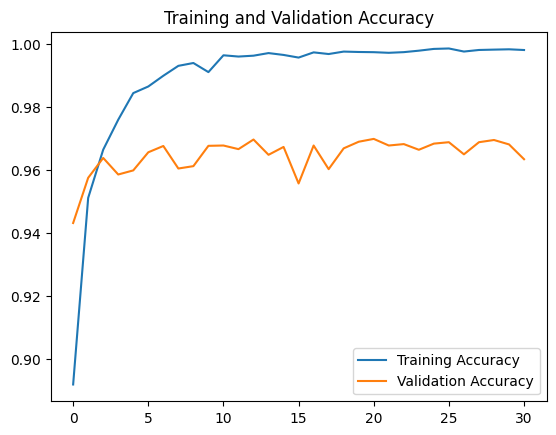

In [23]:
plt.plot(range(len(history)), history["accuracy"], label="Training Accuracy")
plt.plot(range(len(history)), history["val_accuracy"], label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
plt.show()

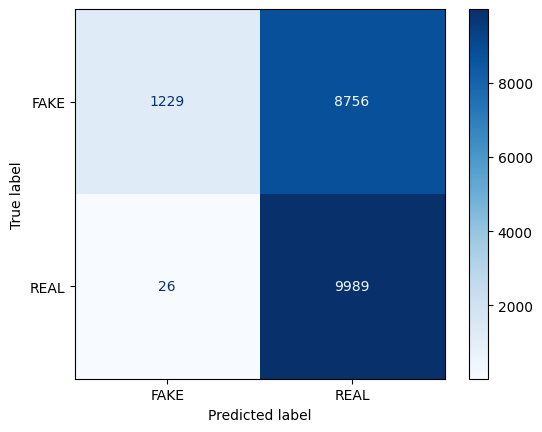

In [24]:
val_predictions = np.array([])
val_labels = np.array([])
for x, y in val:
    val_predictions = np.append(val_predictions, vgg_model(x) > 0.5)
    val_labels = np.append(val_labels, y)
ConfusionMatrixDisplay.from_predictions(val_labels, val_predictions, display_labels=classes, cmap="Blues")

## Inception (not using)!!

In [39]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

In [40]:
IMG_SIZE = (299, 299)
def preprocess(x, y):
  image = tf.image.resize(x, IMG_SIZE)
  image = tf.cast(image, tf.float32)
  image = preprocess_input(image)
  return image, y

trainin = train.map(preprocess)
valin = val.map(preprocess)
testin = test.map(preprocess)

In [41]:
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299,299,3))
for layer in inception_model.layers:
    layer.trainable = False

16982016/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

KeyboardInterrupt: 

In [ ]:
x = keras.layers.GlobalAveragePooling2D()(inception_model.output)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
output = keras.layers.Dense(1, activation='sigmoid')(x)

incept_model = keras.models.Model(inputs=inception_model.input, outputs=output)

In [ ]:
incept_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy", metrics.Precision(name="precision"), metrics.Recall(name="recall")])

In [ ]:
es = EarlyStopping(monitor="val_accuracy",
                   patience=10,
                   restore_best_weights=True,
                   verbose=1)

incept_model.summary(show_trainable=True)

In [ ]:
epochs = 40

history = incept_model.fit(
  trainin,
  validation_data=valin,
  epochs=epochs,
  verbose=3,
  callbacks=es)

history = pd.DataFrame(history.history)
display(history)

In [ ]:
plt.plot(range(len(history)), history["accuracy"], label="Training Accuracy")
plt.plot(range(len(history)), history["val_accuracy"], label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
plt.show()

In [ ]:
val_predictions = np.array([])
val_labels = np.array([])
for x, y in val:
    val_predictions = np.append(val_predictions, incept_model(x) > 0.5)
    val_labels = np.append(val_labels, y)
ConfusionMatrixDisplay.from_predictions(val_labels, val_predictions, display_labels=classes, cmap="Blues")

In [ ]:
incept_model.trainable = True

incept_model.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss="binary_crossentropy",
              metrics=["accuracy", metrics.Precision(name="precision"), metrics.Recall(name="recall")])
es = EarlyStopping(monitor="val_accuracy",
                   patience=10,
                   restore_best_weights=True,
                   verbose=1)
# Train end-to-end. Be careful to stop before you overfit!

epochs = 20

history = incept_model.fit(
  trainin,
  validation_data=valin,
  epochs=epochs,
  verbose=3,
  callbacks=es)

history = pd.DataFrame(history.history)
display(history)

In [ ]:
plt.plot(range(len(history)), history["accuracy"], label="Training Accuracy")
plt.plot(range(len(history)), history["val_accuracy"], label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
plt.show()

In [ ]:
val_predictions = np.array([])
val_labels = np.array([])
for x, y in val:
    val_predictions = np.append(val_predictions, incept_model(x) > 0.5)
    val_labels = np.append(val_labels, y)
ConfusionMatrixDisplay.from_predictions(val_labels, val_predictions, display_labels=classes, cmap="Blues")

## AlexNet Architecture

In [55]:
alex_model = Sequential([
    layers.Rescaling(1./255, input_shape=(32,32, 3)),
    layers.Resizing(227,227),
    #layers.experimental.preprocessing.Resizing(227, 227, interpolation="bilinear"),
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
alex_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing (Resizing)                  │ (None, 227, 227, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_97 (Conv2D)                   │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_94               │ (None, 55, 55, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_98 (Conv2D)                   │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_95               │ (None, 27, 27, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_99 (Conv2D)                   │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_96               │ (None, 13, 13, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_100 (Conv2D)                  │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_97               │ (None, 13, 13, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_101 (Conv2D)                  │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_98               │ (None, 13, 13, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 4096)                │      16,781,3

 Total params: 58,290,945 (222.36 MB)

 Trainable params: 58,288,193 (222.35 MB)

 Non-trainable params: 2,752 (10.75 KB)

In [67]:
alex_model.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy", metrics.Precision(name="precision"), metrics.Recall(name="recall")])

In [68]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

In [70]:
epochs = 40

history = alex_model.fit(
  train,
  validation_data=val,
  epochs=epochs,
  verbose=3, callbacks=[es])

history = pd.DataFrame(history.history)
display(history)

Epoch 1/40
Epoch 2/40
Epoch 3/40
Epoch 4/40
Epoch 5/40
Epoch 6/40
Epoch 7/40
Epoch 8/40
Epoch 9/40
Epoch 10/40
Epoch 11/40
Epoch 12/40
Epoch 13/40
Epoch 14/40


,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
0,2.573411,0.712400,0.711025,0.715293,0.707643,0.54010,0.521670,0.981927
1,0.345495,0.848363,0.845206,0.852795,2.125194,0.50195,0.501352,1.000000
2,0.261217,0.892900,0.892565,0.893235,1.359598,0.55145,0.527506,0.999601
3,0.215618,0.913975,0.914960,0.912717,0.214028,0.91170,0.877805,0.956865
4,0.186700,0.926787,0.926728,0.926798,0.279224,0.87790,0.851807,0.915427
5,0.173265,0.933200,0.934893,0.931199,0.213336,0.91820,0.902566,0.937893
6,0.157512,0.938400,0.939939,0.936601,0.186529,0.92855,0.944042,0.911333
7,0.147189,0.944325,0.944571,0.944004,0.253795,0.89215,0.855952,0.943385
8,0.142697,0.946125,0.947448,0.944604,0.161915,0.93980,0.949128,0.929606
9,0.126421,0.951675,0.952426,0.950807,0.259572,0.88900,0.885777,0.893560


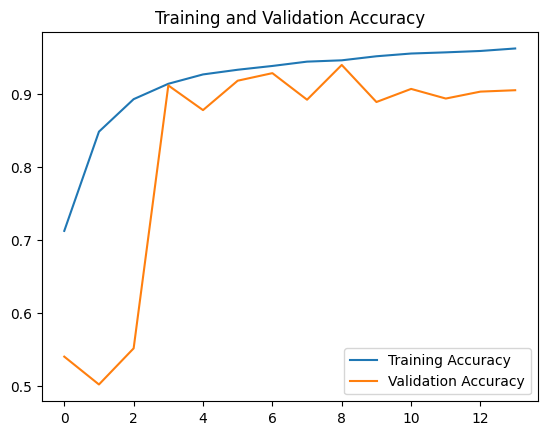

In [71]:
plt.plot(range(len(history)), history["accuracy"], label="Training Accuracy")
plt.plot(range(len(history)), history["val_accuracy"], label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
plt.show()

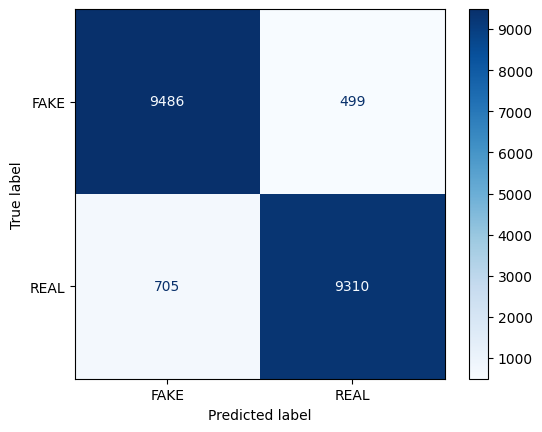

In [78]:
val_predictions = np.array([])
val_labels = np.array([])
for x, y in val:
    val_predictions = np.append(val_predictions, alex_model(x) > 0.5)
    val_labels = np.append(val_labels, y)
ConfusionMatrixDisplay.from_predictions(val_labels, val_predictions, display_labels=classes, cmap="Blues")

## Ensemble Model

In [15]:
!pip install --force-reinstall tensorflow-decision-forests

  Using cached tensorflow_decision_forests-1.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 99.2 MB/s eta 0:00:00
  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 17.5 MB/s eta 0:00:00
  Using cached wheel-0.43.0-py3-none-any.whl (65 kB)
  Using cached wurlitzer-3.0.3-py3-none-any.whl (7.3 kB)
  Using cached tf_keras-2.16.0-py3-none-any.whl (1.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.2 MB/s eta 0:00:00
  Using cached h5py-3.11.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 57.3 MB/s eta 0:00:00
  Using cached ml_dtypes-0.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
     ━━━━━━━

In [6]:
!pip install wurlitzer -U --quiet

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [4]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.1


In [3]:
tfdf.__version__

'1.9.0'

In [2]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'
#from tensorflow.keras.layers import Layer, Concatenate
#from tensorflow.keras.layers import Average
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import tensorflow_decision_forests as tfdf


In [67]:
alex_nn = tf_keras.Input(shape=(32,32,3))
alex_nn = tf_keras.layers.Rescaling(1./255)(alex_nn)
alex_nn = tf_keras.layers.Resizing(227, 227, interpolation="bilinear")(alex_nn)
alex_nn = tf_keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu')(alex_nn)
alex_nn = tf_keras.layers.BatchNormalization()(alex_nn)
alex_nn = tf_keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2))(alex_nn)
alex_nn = tf_keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same")(alex_nn)
alex_nn = tf_keras.layers.BatchNormalization()(alex_nn)
alex_nn = tf_keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2))(alex_nn)
alex_nn = tf_keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(alex_nn)
alex_nn = tf_keras.layers.BatchNormalization()(alex_nn)
alex_nn = tf_keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(alex_nn)
alex_nn = tf_keras.layers.BatchNormalization()(alex_nn)
alex_nn = tf_keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(alex_nn)
alex_nn = tf_keras.layers.BatchNormalization()(alex_nn)
alex_nn = tf_keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2))(alex_nn)
alex_nn = tf_keras.layers.Flatten()(alex_nn)
alex_nn = tf_keras.layers.Dense(4096, activation='relu')(alex_nn)
alex_nn = tf_keras.layers.Dropout(0.5)(alex_nn)
alex_nn = tf_keras.layers.Dense(4096, activation='relu')(alex_nn)
alex_nn = tf_keras.layers.Dropout(0.5)(alex_nn)
alex_nn = tf_keras.layers.Dense(1, activation='sigmoid')(alex_nn)

In [68]:
c_nn = tf_keras.Input(shape=(32,32,3))
c_nn = tf_keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3))(c_nn)
c_nn = tf_keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same")(c_nn)
c_nn = tf_keras.layers.MaxPooling2D()(c_nn)
c_nn = tf_keras.layers.Dropout(0.4)(c_nn)
c_nn = tf_keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same")(c_nn)
c_nn = tf_keras.layers.MaxPooling2D()(c_nn)
c_nn = tf_keras.layers.Dropout(0.4)(c_nn)
c_nn = tf_keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same")(c_nn)
c_nn = tf_keras.layers.MaxPooling2D()(c_nn)
c_nn = tf_keras.layers.Dropout(0.4)(c_nn)
c_nn = tf_keras.layers.Flatten()(c_nn)
c_nn = tf_keras.layers.Dense(units=512, activation="relu")(c_nn)
c_nn = tf_keras.layers.Dense(units=1, activation="sigmoid")(c_nn)

In [106]:
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

def preprocess_vgg(x, y):
    return preprocess_input(x), y


class PreprocessVGGLayer(tf.keras.layers.Layer):
    def __init__(self, name="preprocess_vgg", **kwargs):
        super(PreprocessVGGLayer, self).__init__(name=name, **kwargs)
        self.preprocess = preprocess_vgg

    def call(self, input):
        return self.preprocess(input)

    def get_config(self):
        config = super(PreprocessVGGLayer, self).get_config()
        return config

vgg_tf = tf_keras.Input(shape=(32,32,3))
#vgg_tf = PreprocessVGGLayer()(vgg_tf)
vgg_tf = tf_keras.layers.Lambda(preprocess_input)(vgg_tf)
vgg_tf = vgg(vgg_tf)
vgg_tf = tf_keras.layers.Flatten()(vgg_tf)
vgg_tf = tf_keras.layers.Dropout(0.5)(vgg_tf)
vgg_tf = tf_keras.layers.Dense(units=1024, activation="relu")(vgg_tf)
vgg_tf = tf_keras.layers.Dense(units=1, activation="sigmoid")(vgg_tf)

In [107]:
# Input features.
raw_features = tf_keras.layers.Input(shape=(32,32,3))



mean_nn_only = tf.reduce_mean(tf.stack([c_nn, vgg_tf, alex_nn], axis=0), axis=0)


# Keras Models
# ============

ensemble_nn_only = tf_keras.models.Model(raw_features, mean_nn_only)

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='input_32'), name='input_32', description="created by layer 'input_32'") at layer "lambda_9". The following previous layers were accessed without issue: []

In [ ]:
%%time
ensemble_nn_only.compile(
        optimizer=tf_keras.optimizers.Adam(),
        loss=tf_keras.losses.BinaryCrossentropy(),
        metrics=["accuracy"])

ensemble_nn_only.fit(train_dataset, epochs=20, validation_data=test_dataset)

## Not Using

In [107]:
def weighted_init(shape =(1,1,3), weights=[1,1,1], dtype=tf.float32):
    return tf.constant(np.array(weights).reshape(shape), dtype=dtype)

In [99]:
class WeightedAverage(Layer):

    def __init__(self):
        super(WeightedAverage, self).__init__()

    def build(self, input_shape):

        self.W = self.add_weight(
                    shape=(1,1,len(input_shape)),
                    initializer=weighted_init,
                    dtype=tf.float32,
                    trainable=True)
    def call(self, inputs):

        inputs = [tf.expand_dims(i, -1) for i in inputs]
        inputs = Concatenate(axis=-1)(inputs)
        weights = tf.nn.softmax(self.W, axis=-1)

        return tf.reduce_mean(weights*inputs, axis=-1)

In [108]:
input = layers.Input(shape=(32, 32, 3), name='input') # input layer

# get output for each model input
outputs = [model(input) for model in models]

# contenate the ouputs
x =  WeightedAverage()(outputs)

# add further layers
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation='sigmoid', name='output')(x) # output layer

# create concatenated model
wa_model = keras.Model(input, output, name= 'WA_Model')


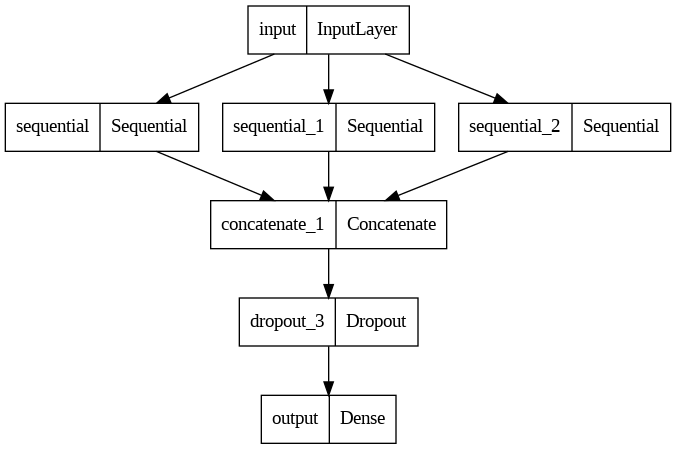

In [101]:
from tensorflow.keras.utils import plot_model
plot_model(conc_model)

In [109]:
wa_model.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy", metrics.Precision(name="precision"), metrics.Recall(name="recall")])

In [110]:
wa_model.evaluate(testvgg, return_dict=True)

40/40 [==============================] - 3s 62ms/step - loss: 0.6928 - accuracy: 0.5000 - precision: 0.5000 - recall: 1.0000


{'loss': 0.6928278207778931, 'accuracy': 0.5, 'precision': 0.5, 'recall': 1.0}

In [ ]:
test_predictions = np.array([])
test_labels = np.array([])
for x, y in test:
    test_predictions = np.append(test_predictions, conc_model(x) > 0.5)
    test_labels = np.append(test_labels, y)
ConfusionMatrixDisplay.from_predictions(test_labels, test_predictions, display_labels=classes, cmap="Blues")